In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv('Superstore.csv', encoding='latin-1')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
data.shape

(9994, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [6]:
def clean_and_separate(dataframe):
    dataframe.drop(['Row ID', 'Country', 'Customer Name'], axis = 1, inplace = True)
    dataframe['Ship Date'] = pd.to_datetime(dataframe['Ship Date'], format = '%d-%m-%Y')
    dataframe['Order Date'] = pd.to_datetime(dataframe['Order Date'], format = '%d-%m-%Y')
    dataframe['Ship Year'] = dataframe['Ship Date'].dt.year
    dataframe['Ship Month'] = dataframe['Ship Date'].dt.month
    dataframe['Ship Day'] = dataframe['Ship Date'].dt.day
    dataframe['Order Year'] = dataframe['Order Date'].dt.year
    dataframe['Order Month'] = dataframe['Order Date'].dt.month
    dataframe['Order Day'] = dataframe['Order Date'].dt.day
    dataframe['Price per Piece'] = dataframe['Sales'] / dataframe['Quantity']
    dataframe['Profit per Piece'] = dataframe['Profit'] / dataframe['Quantity']
    dataframe['Delivery Time'] = (dataframe['Ship Date'] - dataframe['Order Date']).dt.days
    return dataframe
df = clean_and_separate(data)
#df.reindex()
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Postal Code,Region,...,Profit,Ship Year,Ship Month,Ship Day,Order Year,Order Month,Order Day,Price per Piece,Profit per Piece,Delivery Time
0,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,...,41.9136,2013,11,12,2013,11,9,130.9800,20.9568,3
1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,...,219.5820,2013,11,12,2013,11,9,243.9800,73.1940,3
2,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,...,6.8714,2013,6,17,2013,6,13,7.3100,3.4357,4
3,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,...,-383.0310,2012,10,18,2012,10,11,191.5155,-76.6062,7
4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,...,2.5164,2012,10,18,2012,10,11,11.1840,1.2582,7


In [7]:
df.select_dtypes(exclude=['object']).nunique()

Order Date          1238
Ship Date           1334
Postal Code          631
Sales               5825
Quantity              14
Discount              12
Profit              7287
Ship Year              5
Ship Month            12
Ship Day              31
Order Year             4
Order Month           12
Order Day             31
Price per Piece     3298
Profit per Piece    4246
Delivery Time          8
dtype: int64

<Axes: title={'center': 'Segment Distribution'}>

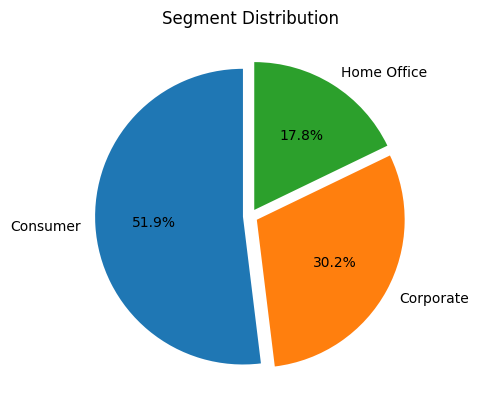

In [14]:
df['Segment'].value_counts().plot(
    kind = 'pie',
    autopct='%1.1f%%',
    startangle=90,
    ylabel='',
    explode = (0.05, 0.05, 0.05),
    title = 'Segment Distribution',
)

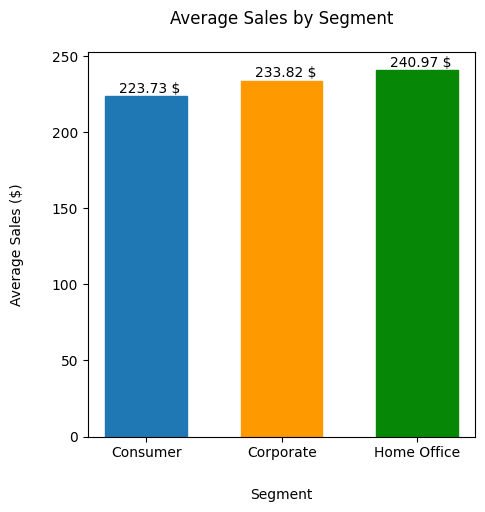

In [9]:
# Create the grouped data first
sales_by_segment = df.groupby('Segment').agg({'Sales':'mean'})

# Create the plot
fig, ax = plt.subplots(figsize=(5, 5))
bars = ax.bar(sales_by_segment.index, sales_by_segment['Sales'], width=0.6)

# Set individual colors for each bar
colors = ['#1f77b4', "#ff9900", "#068706"]  # Dark blue, Orange, Green
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Customize the plot
ax.set_title('Average Sales by Segment', pad=20)
ax.set_ylabel('Average Sales ($)', labelpad=20)
ax.set_xlabel('Segment', labelpad=20)

for i, x in enumerate(sales_by_segment['Sales']):
    ax.text(i-0.2, x+5, f'{x:,.2f} $', va='center', fontsize=10)

plt.show()

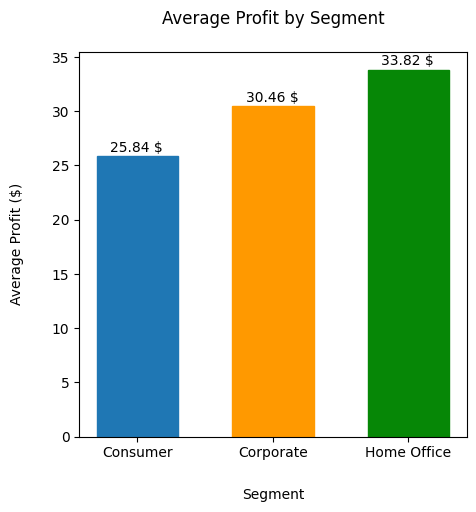

In [10]:
# Create the grouped data first
sales_by_segment = df.groupby('Segment').agg({'Profit':'mean'})

# Create the plot
fig, ax = plt.subplots(figsize=(5, 5))
bars = ax.bar(sales_by_segment.index, sales_by_segment['Profit'], width=0.6)

# Set individual colors for each bar
colors = ['#1f77b4', "#ff9900", "#068706"]  # Dark blue, Orange, Green
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Customize the plot
ax.set_title('Average Profit by Segment', pad=20)
ax.set_ylabel('Average Profit ($)', labelpad=20)
ax.set_xlabel('Segment', labelpad=20)

for i, x in enumerate(sales_by_segment['Profit']):
    ax.text(i-0.2, x+0.8, f'{x:,.2f} $', va='center', fontsize=10)

plt.show()

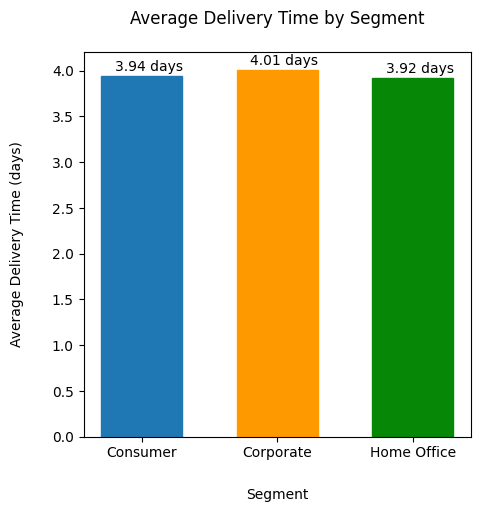

In [13]:
# Create the grouped data first
sales_by_segment = df.groupby('Segment').agg({'Delivery Time':'mean'})

# Create the plot
fig, ax = plt.subplots(figsize=(5, 5))
bars = ax.bar(sales_by_segment.index, sales_by_segment['Delivery Time'], width=0.6)

# Set individual colors for each bar
colors = ['#1f77b4', "#ff9900", "#068706"]  # Dark blue, Orange, Green
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Customize the plot
ax.set_title('Average Delivery Time by Segment', pad=20)
ax.set_ylabel('Average Delivery Time (days)', labelpad=20)
ax.set_xlabel('Segment', labelpad=20)

for i, x in enumerate(sales_by_segment['Delivery Time']):
    ax.text(i-0.2, x+0.1, f'{x:,.2f} days', va='center', fontsize=10)

plt.show()

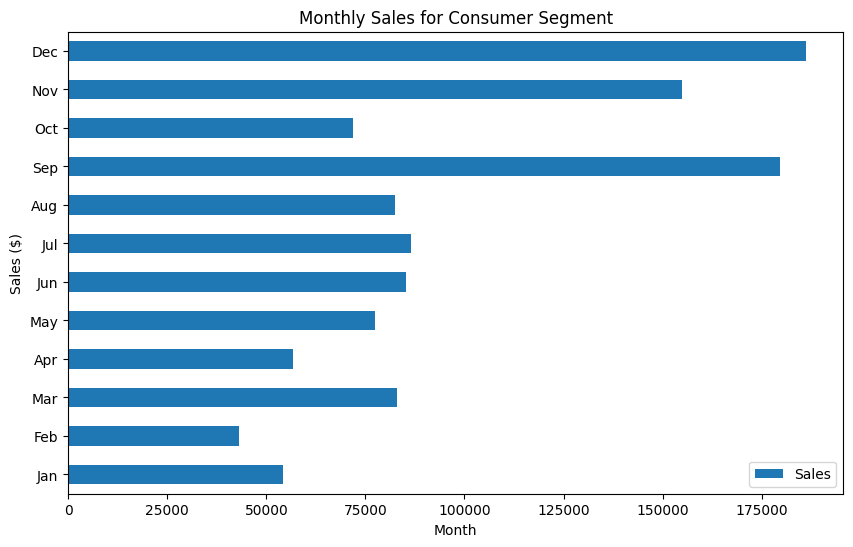

In [28]:
# Create figure and axes first
fig, ax = plt.subplots(figsize=(10, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_sales = df.query("(Segment == 'Consumer')").groupby('Ship Month').agg({'Sales':'sum'})
monthly_sales.index = month_names
monthly_sales.plot(kind='barh', ax=ax)

# Customize the plot
ax.set_title('Monthly Sales for Consumer Segment')
ax.set_ylabel('Sales ($)')
ax.set_xlabel('Month')

plt.show()

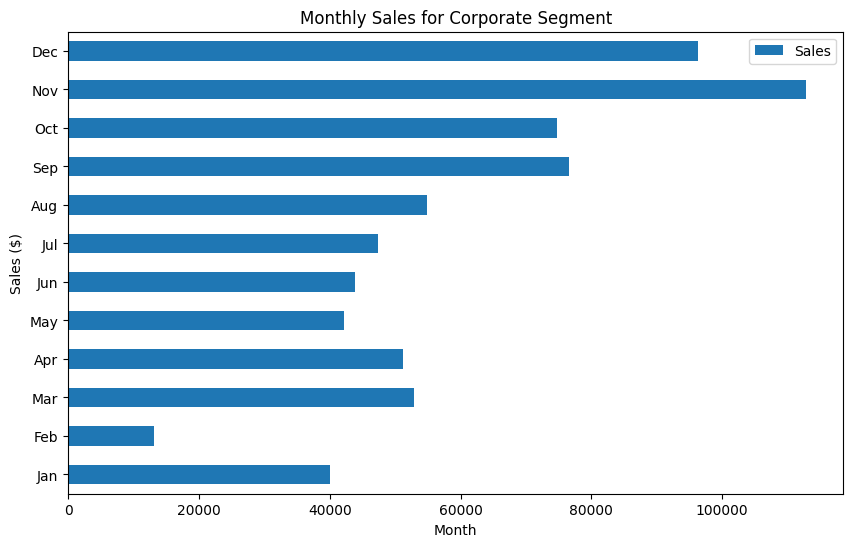

In [30]:
# Create figure and axes first
fig, ax = plt.subplots(figsize=(10, 6))

monthly_sales = df.query("(Segment == 'Corporate')").groupby('Ship Month').agg({'Sales':'sum'})
monthly_sales.index = month_names
monthly_sales.plot(kind='barh', ax=ax)

# Customize the plot
ax.set_title('Monthly Sales for Corporate Segment')
ax.set_ylabel('Sales ($)')
ax.set_xlabel('Month')

plt.show()

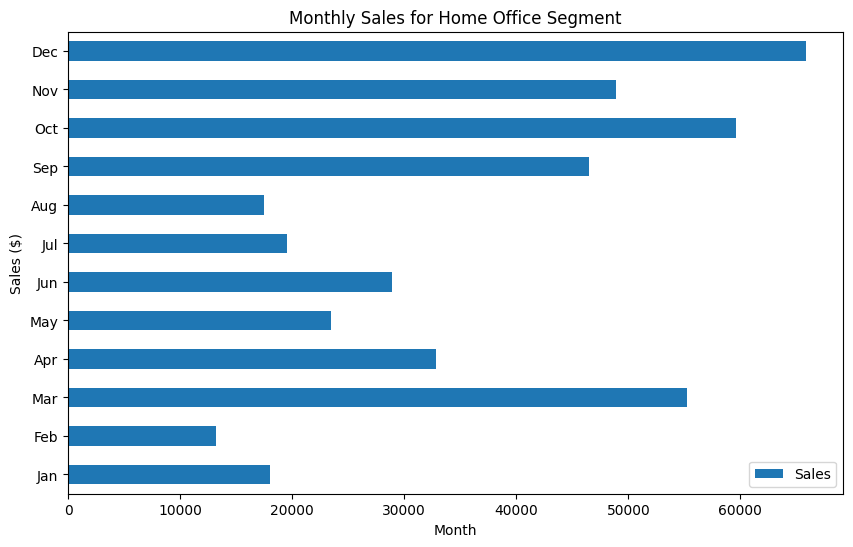

In [31]:
# Create figure and axes first
fig, ax = plt.subplots(figsize=(10, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_sales = df.query("(Segment == 'Home Office')").groupby('Ship Month').agg({'Sales':'sum'})
monthly_sales.index = month_names
monthly_sales.plot(kind='barh', ax=ax)

# Customize the plot
ax.set_title('Monthly Sales for Home Office Segment')
ax.set_ylabel('Sales ($)')
ax.set_xlabel('Month')

plt.show()

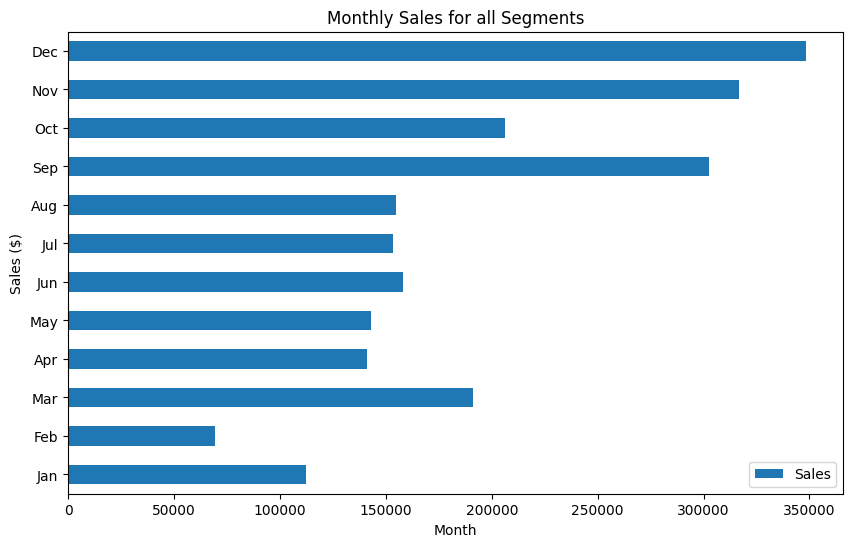

In [33]:
# Create figure and axes first
fig, ax = plt.subplots(figsize=(10, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_sales = df.groupby('Ship Month').agg({'Sales':'sum'})
monthly_sales.index = month_names
monthly_sales.plot(kind='barh', ax=ax)

# Customize the plot
ax.set_title('Monthly Sales for all Segments')
ax.set_ylabel('Sales ($)')
ax.set_xlabel('Month')

plt.show()

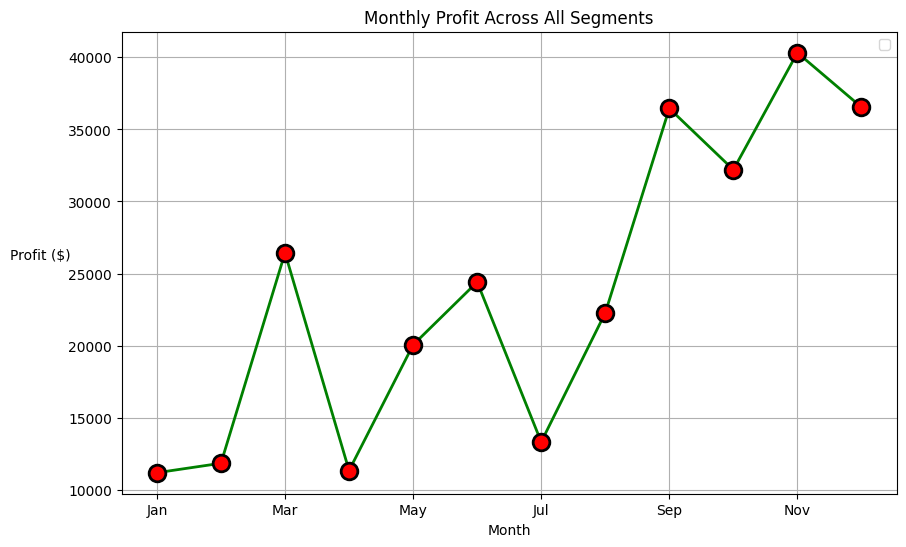

In [55]:
# Create figure and axes first
fig, ax = plt.subplots(figsize=(10, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_sales = df.groupby('Ship Month').agg({'Profit':'sum'})
monthly_sales.index = month_names
monthly_sales.plot(
                kind='line', 
                ax=ax, 
                color ='green',
                lw = 2,
                marker='o', 
                markerfacecolor='red', 
                markeredgewidth=2, 
                markersize=12, 
                markeredgecolor='black',
                grid = 'True')

# Customize the plot
ax.set_title('Monthly Profit Across All Segments')
ax.set_ylabel('Profit ($)', rotation=0, labelpad=20)
ax.set_xlabel('Month')
ax.legend('')

plt.show()

<Axes: >

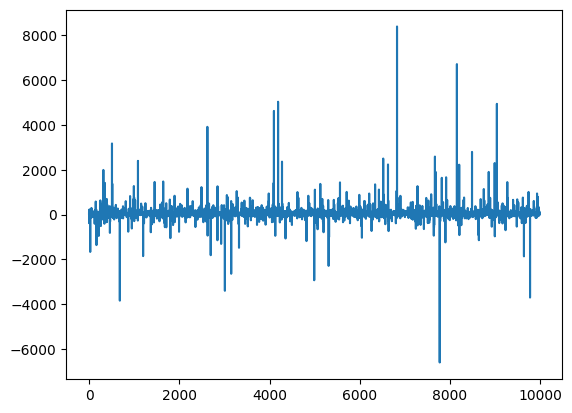

In [43]:
df['Profit'].plot(kind = 'line', x='Ship Date')

In [49]:
# Aggregate profits by date
daily_profits = df.groupby('Ship Date')['Profit'].sum().reset_index()

# Create an improved line plot
fig = px.line(daily_profits, 
              x='Ship Date', 
              y='Profit',
              title='Daily Total Profit Over Time',
              labels={'Ship Date': 'Date', 'Profit': 'Total Profit ($)'},
              template='plotly_white')

# Customize the layout
fig.update_layout(
    showlegend=False,
    xaxis_title="Date",
    yaxis_title="Total Profit ($)",
    hovermode='x unified'
)

fig.show()